In [5]:
#1. Exploratory Data Analysis (EDA)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [7]:
# Display basic information
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [8]:
# Merging transactions with products and customers for combined analysis
data = transactions.merge(products, on='ProductID').merge(customers, on='CustomerID')

In [9]:
data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,SoundWave Smartwatch,Electronics,459.86,Jacob Holt,South America,2022-01-22
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,SoundWave Smartwatch,Electronics,459.86,Mrs. Kimberly Wright,North America,2024-04-07
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,SoundWave Smartwatch,Electronics,459.86,Tyler Haynes,North America,2024-09-21
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,SoundWave Smartwatch,Electronics,459.86,Joshua Hamilton,Asia,2024-11-11


In [13]:
# Checking for missing values
print(data.isnull().sum())

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
ProductName        0
Category           0
Price_y            0
CustomerName       0
Region             0
SignupDate         0
dtype: int64


In [18]:
# Top 5 most purchased products
top_products = data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(5)
print(top_products)


ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64


In [19]:
# Top 5 customers by total transaction value
top_customers = data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(5)
print(top_customers)


CustomerName
Paul Parsons     10673.87
Bruce Rhodes      8040.39
Gerald Hines      7663.70
William Adams     7634.45
Aimee Taylor      7572.91
Name: TotalValue, dtype: float64


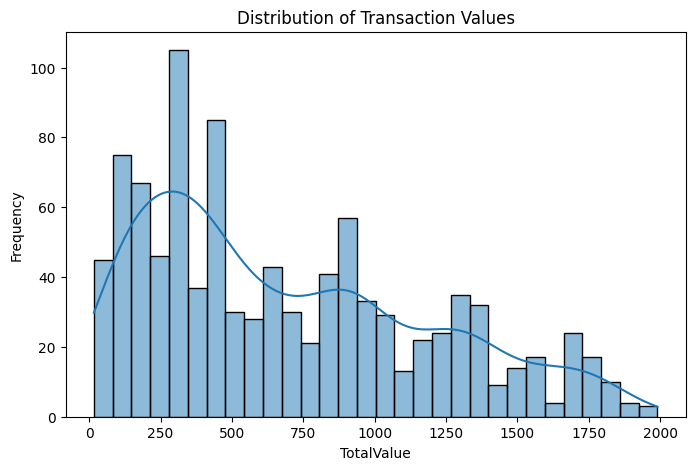

In [20]:

# Visualization: Distribution of TotalValue
plt.figure(figsize=(8, 5))
sns.histplot(data['TotalValue'], bins=30, kde=True)
plt.title("Distribution of Transaction Values")
plt.xlabel("TotalValue")
plt.ylabel("Frequency")
plt.show()

In [25]:
#2 .Lookalike Model
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np


In [23]:
# Combine customer profiles and transaction data
customer_profiles = data.groupby('CustomerID').agg({
    'ProductName': lambda x: ' '.join(x),
    'TotalValue': 'sum'
}).reset_index()


In [24]:
customer_profiles

,CustomerID,ProductName,TotalValue
0,C0001,SoundWave Cookbook HomeSense Wall Art SoundWav...,3354.52
1,C0002,BookWorld Cookware Set BookWorld Rug ComfortLi...,1862.74
2,C0003,ActiveWear Cookware Set ActiveWear Rug ActiveW...,2725.38
3,C0004,TechPro Textbook TechPro Rug TechPro Vase Acti...,5354.88
4,C0005,ActiveWear Cookware Set TechPro Smartwatch Com...,2034.24
...,...,...,...
194,C0196,ComfortLiving Mystery Book ActiveWear Jacket A...,4982.88
195,C0197,ActiveWear Wall Art BookWorld Smartwatch Sound...,1928.65
196,C0198,ComfortLiving Laptop HomeSense Running Shoes,931.83
197,C0199,ComfortLiving Bluetooth Speaker HomeSense Wall...,1979.28


In [26]:

# Use TF-IDF for text similarity
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(customer_profiles['ProductName'])

In [27]:

# Compute cosine similarity
similarity_matrix = cosine_similarity(tfidf_matrix)

In [28]:

# Find top 3 similar customers for the first 20 customers
lookalikes = {}
for i, customer_id in enumerate(customer_profiles['CustomerID'][:20]):
    similar_indices = np.argsort(similarity_matrix[i])[::-1][1:4]  # Exclude itself
    similar_customers = [(customer_profiles.iloc[j]['CustomerID'], similarity_matrix[i][j]) for j in similar_indices]
    lookalikes[customer_id] = similar_customers


In [29]:

# Save results to Lookalike.csv
lookalike_df = pd.DataFrame([
    {'CustomerID': customer, 'SimilarCustomers': str(lookalikes[customer])} for customer in lookalikes
])
lookalike_df.to_csv('Lookalike.csv', index=False)

In [30]:
lookalike_df

,CustomerID,SimilarCustomers
0,C0001,"[('C0197', 0.8173310844459089), ('C0026', 0.73..."
1,C0002,"[('C0133', 0.8837932938918894), ('C0173', 0.76..."
2,C0003,"[('C0164', 0.7229023422425487), ('C0085', 0.65..."
3,C0004,"[('C0118', 0.740279454546346), ('C0008', 0.718..."
4,C0005,"[('C0128', 0.7597061203041797), ('C0096', 0.74..."
5,C0006,"[('C0187', 0.7556461121621504), ('C0191', 0.67..."
6,C0007,"[('C0181', 0.7415071718107727), ('C0031', 0.68..."
7,C0008,"[('C0057', 0.85208163469467), ('C0143', 0.7768..."
8,C0009,"[('C0093', 0.700126756309084), ('C0156', 0.699..."
9,C0010,"[('C0058', 0.7631974924303424), ('C0092', 0.71..."


In [31]:
#3. Customer Segmentation / Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score


In [32]:

# Prepare data for clustering
features = customer_profiles[['TotalValue']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [36]:
features


,TotalValue
0,3354.52
1,1862.74
2,2725.38
3,5354.88
4,2034.24
...,...
194,4982.88
195,1928.65
196,931.83
197,1979.28


In [38]:
scaler

StandardScaler()

In [39]:
scaled_features

array([[-0.06170143],
       [-0.87774353],
       [-0.40585722],
       [ 1.03254704],
       [-0.78392861],
       [ 0.41587942],
       [-0.48548229],
       [ 0.43997044],
       [-1.40630171],
       [-0.9571662 ],
       [ 0.14369581],
       [ 0.96492372],
       [ 1.38575064],
       [-1.72239508],
       [-1.26353893],
       [ 0.22269727],
       [ 0.70375173],
       [ 0.71908486],
       [-0.70101045],
       [-1.39212827],
       [ 1.0681256 ],
       [ 0.64973294],
       [ 0.92520418],
       [ 0.08736309],
       [-1.02704328],
       [ 0.04471149],
       [-0.49471609],
       [ 1.83377022],
       [-0.9197934 ],
       [-0.50196965],
       [-0.79971578],
       [-1.52856197],
       [-1.82415282],
       [-0.21559072],
       [-0.48122096],
       [-0.8694178 ],
       [ 0.42966447],
       [-0.42146387],
       [ 0.42246014],
       [ 0.27465378],
       [ 1.46737783],
       [-0.58248637],
       [-1.27784912],
       [-0.1297569 ],
       [ 1.39736947],
       [ 1

In [33]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [40]:
kmeans

KMeans(n_clusters=3, random_state=42)

In [41]:
clusters

array([1, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1, 0, 0, 2, 2, 1, 0, 0, 2, 2, 0, 0,
       0, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 2, 2, 2, 2, 1, 0, 1,
       1, 0, 1, 1, 2, 1, 2, 1, 0, 1, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 0, 2,
       1, 1, 1, 1, 0, 2, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2,
       2, 2, 0, 0, 1, 1, 1, 1, 2, 1, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 0, 1, 2, 0, 2, 0, 2, 0, 1, 1, 0, 1, 2, 2, 1, 0, 1,
       0, 0, 2, 1, 2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 0, 2, 2, 2,
       0], dtype=int32)

In [43]:

# Add clusters to the dataset
customer_profiles['Cluster'] = clusters


In [45]:
# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, clusters)
print(f"Davies-Bouldin Index: {db_index}")


Davies-Bouldin Index: 0.554679077497207


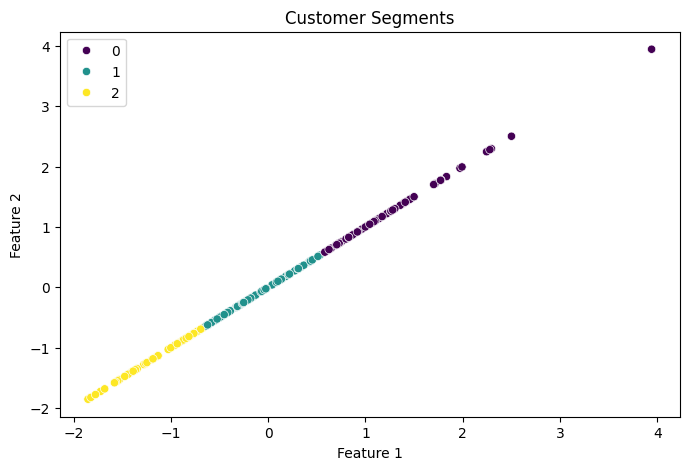

In [46]:
# Visualize clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 0], hue=clusters, palette='viridis')
plt.title("Customer Segments")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()